In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = pd.read_csv('poverty.csv')
df.head()

,Province,ISO,Poor 2020,Poor 2021,Difference,Rate
0,Aceh,AC,814.91,834.24,19.33,2.37
1,Sumatera Utara,SU,1283.29,1343.86,60.57,4.72
2,Sumatera Barat,SB,344.23,370.67,26.44,7.68
3,Riau,RI,483.39,500.81,17.42,3.60
4,Jambi,JA,277.80,293.86,16.06,5.78


In [3]:
# Import GeoJSON data
df_geo = gpd.read_file('geo_IDN.json')
display(df_geo.head())

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


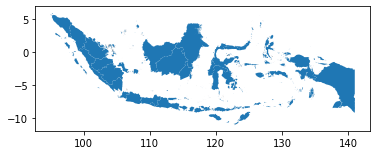

In [4]:
df_geo.plot();

In [4]:
# Merge df_geo and poverty.csv
df_merged = df_geo.merge(df, how='inner', left_on='NAME_1', right_on='Province')
df_merged = df_merged[['Province', 'ISO', 'Poor 2020', 'Poor 2021', 'Difference', 'Rate', 'geometry']]
df_merged.head()

,Province,ISO,Poor 2020,Poor 2021,Difference,Rate,geometry
0,Aceh,AC,814.91,834.24,19.33,2.37,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,Bali,BA,165.19,201.97,36.78,22.27,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,Bangka Belitung,BB,68.39,72.71,4.32,6.32,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,Banten,BT,775.99,867.23,91.24,11.76,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,Bengkulu,BE,302.58,306.00,3.42,1.13,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


In [ ]:
# set a variable that will call whatever column we want to visualise on the map
values = 'Rate'
values2 = "Indonesia's Poverty Rate 2020-2021"
    
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
    
# set the value range for the choropleth
vmin, vmax = df_merged[values].min(), df_merged[values].max()
    
# remove the axis
ax.axis('off')
    
# add a title
title = '{}'.format(values2)
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '10'})
    
# create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia', 
xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, fontweight='bold', color='k')

# create map
df_merged.plot(column=values, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
values = 'Rate'
values2 = "Indonesia's Poverty Rate 2020-2021"
    
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
    
# set the value range for the choropleth
vmin, vmax = df_merged[values].min(), df_merged[values].max()
    
# remove the axis
ax.axis('off')
    
# add a title
title = '{}'.format(values2)
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '10'})
    
# create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia', 
xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, fontweight='bold', color='k')
    
# Add Labels
df_merged['coords'] = df_merged['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merged['coords'] = [coords[0] for coords in df_merged['coords']]

for idx, row in df_merged.iterrows():
    ann = row['ISO']
    ann += '\n'
    ann += str(row['Rate'])
    plt.annotate(s=ann, xy=row['coords'], horizontalalignment='center')
    
# create map
df_merged.plot(column=values, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

## **Plotly**

In [ ]:
import plotly.express as px 


fig = px.choropleth(df_merged, geojson=df_merged.geometry, 
                    locations=df_merged.index, color='Rate',
                    height=500, color_continuous_scale='Reds', hover_name='Province', hover_data=None)

fig.update_geos(fitbounds='locations', visible=False)
fig.update_layout(
    title_text="Indonesia's Poverty Rate 2020-2021")

fig.update(layout = dict(title=dict(x=0.46)))
fig.update_layout(
    margin={'r':0,'t':30,'l':10,'b':10},
    coloraxis_colorbar={
        'title':'Rate'})

fig.show(renderer='notebook');

## **Folium**

In [ ]:
import pandas as pd
import folium 
import numpy as np

# Create a map called map_indo.
map_indo = folium.Map(location=[-2.49607,117.89587], tiles='OpenStreetMap', zoom_start=5)

# Set up Choropleth map
folium.Choropleth(
    geo_data=df_merged,
    data=df_merged,
    columns=['Province','Rate'],
    key_on='feature.properties.Province',
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name='Rate',
    smooth_factor=0,
    Highlight= True,
    line_color = '#0000',
    name = 'Rate',
    show=True,
    overlay=True
).add_to(map_indo)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = df_merged,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Province','Rate'],
        aliases=['Province','Rate'],
        style=('background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;') 
    )
)
map_indo.add_child(NIL)
map_indo.keep_in_front(NIL)

# Add dark and light mode. 
folium.TileLayer('cartodbdark_matter', name='dark mode', control=True).add_to(map_indo)
folium.TileLayer('cartodbpositron', name='light mode', control=True).add_to(map_indo)

# Add a layer controller. 
folium.LayerControl(collapsed=False).add_to(map_indo)
map_indo